In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Full_Finalized_numeric_data_for_training.csv')

In [3]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
data

,state,cityname,persongender,personexactage,personmaritalstatus,traveler,ZipCode,investment,estimatedincomecode,PresenceOfCreditCard,CreditRating,Duration,hour,Label
0,18,5768,0,87,1,0,86429,0,6,0,1,0,12,0
1,18,4600,1,83,3,1,85939,1,3,1,7,14,9,1
2,18,4373,0,2,1,0,85712,0,13,0,4,24,15,1
3,18,4373,1,62,3,1,85736,1,3,1,2,0,9,0
4,18,3375,0,50,1,0,85335,0,12,0,4,0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335869,16,651,1,69,3,1,19468,1,3,1,8,0,12,0
335870,16,1520,1,84,1,0,19468,0,8,0,1,0,9,0
335871,16,3163,0,88,3,1,19468,0,8,1,1,0,14,0
335872,16,9064,0,94,3,1,19468,0,6,1,8,0,12,0


In [4]:
data_copy = data.copy()

In [5]:
train_data = data_copy.drop(["Duration","Label"],axis=1)

In [32]:
train_data = train_data.drop(['PresenceOfCreditCard','ZipCode','traveler'],axis=1)

In [33]:
train_data

,cityname,persongender,personexactage,personmaritalstatus,investment,estimatedincomecode,CreditRating,hour
0,5768,0,87,1,0,6,1,12
1,4600,1,83,3,1,3,7,9
2,4373,0,2,1,0,13,4,15
3,4373,1,62,3,1,3,2,9
4,3375,0,50,1,0,12,4,13
...,...,...,...,...,...,...,...,...
335869,651,1,69,3,1,3,8,12
335870,1520,1,84,1,0,8,1,9
335871,3163,0,88,3,0,8,1,14
335872,9064,0,94,3,0,6,8,12


In [34]:
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(
      train_data, data['Label'], test_size = 0.30)
  
# Remember that we are trying to come up
# with a model to predict whether
# someone will TARGET CLASS or not.
# We'll start with k = 1.
  
from sklearn.neighbors import KNeighborsClassifier
  
knn = KNeighborsClassifier(n_neighbors = 1)
  
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
  
# Predictions and Evaluations
# Let's evaluate our KNN model ! 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))
  
print(classification_report(y_test, pred))

[[27448 24903]
 [24721 23691]]
              precision    recall  f1-score   support

           0       0.53      0.52      0.53     52351
           1       0.49      0.49      0.49     48412

    accuracy                           0.51    100763
   macro avg       0.51      0.51      0.51    100763
weighted avg       0.51      0.51      0.51    100763



In [35]:
print(knn.score(X_test, y_test))

0.5075176404037196


In [29]:
relation = train_data['ZipCode'].corr(train_data['personmaritalstatus'])

In [30]:
relation

-0.0025398189694103976

In [36]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_iris

# Loading data
Data = data

# Create feature and target arrays
X = train_data
y =  Data['Label']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state=0)

knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=8)

In [37]:
prediction = knn.predict(X_test)
prediction


array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [38]:
print(knn.score(X_test, y_test))

0.511023446222553


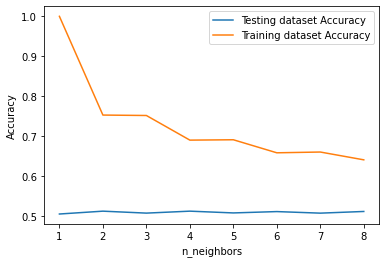

In [40]:
import numpy as np
import matplotlib.pyplot as plt

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [41]:
acc=knn.score(X_test, y_test)
acc

0.511023446222553

# Random Forest

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_data,data['Label'],test_size=0.3)

In [70]:
len(X_train)

235111

In [73]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [74]:
model.score(X_test,y_test)

0.5063664241834801